In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as sts
import matplotlib as mpl 

%matplotlib inline

In [14]:
from sklearn.decomposition import FactorAnalysis as fact
from sklearn.decomposition import PCA as pca

In [16]:
#Clustering modules
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls

In [87]:
#For the tree
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [1]:
path = "C:/Users/Administrator/Documents/Master/MSIS-5223-70250 - Programming for Data Sci - 8282017 - 159 PM/Data for Tutorials and ICE/Data"
os.chdir(path)
df = pd.read_table('car.test.frame.txt', sep= '\t')

NameError: name 'os' is not defined

In [27]:
df = df.dropna()

In [28]:
df1 = df.copy()

In [29]:
df1.columns

Index(['Price', 'Country', 'Reliability', 'Mileage', 'Type', 'Weight', 'Disp.',
       'HP'],
      dtype='object')

In [89]:
df1.dtypes

Price             int64
Country          object
Reliability     float64
Mileage           int64
Type           category
Weight            int64
Disp.             int64
HP                int64
dtype: object

In [90]:
df1.head()

,Price,Country,Reliability,Mileage,Type,Weight,Disp.,HP
0,8895,USA,4.0,33,Small,2560,97,113
1,7402,USA,2.0,33,Small,2345,114,90
2,6319,Korea,4.0,37,Small,1845,81,63
3,6635,Japan/USA,5.0,32,Small,2260,91,92
4,6599,Japan,5.0,32,Small,2440,113,103


In [91]:
rows, cols = df1.shape
rows, cols

(49, 8)

In [43]:
df1.head()

,Price,Country,Reliability,Mileage,Type,Weight,Disp.,HP
0,8895,USA,4.0,33,Small,2560,97,113
1,7402,USA,2.0,33,Small,2345,114,90
2,6319,Korea,4.0,37,Small,1845,81,63
3,6635,Japan/USA,5.0,32,Small,2260,91,92
4,6599,Japan,5.0,32,Small,2440,113,103


In [49]:
df1.describe()

,Price,Reliability,Mileage,Weight,Disp.,HP
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,12452.081633,3.387755,24.795918,2897.755102,156.714286,125.408163
std,4229.656447,1.455111,4.813088,500.257289,57.374138,32.514688
min,6319.000000,1.000000,18.000000,1845.000000,81.000000,63.000000
25%,9599.000000,2.000000,21.000000,2560.000000,114.000000,102.000000
50%,11650.000000,3.000000,23.000000,2885.000000,146.000000,115.000000
75%,14944.000000,5.000000,27.000000,3265.000000,181.000000,150.000000
max,24760.000000,5.000000,37.000000,3855.000000,305.000000,225.000000


In [52]:
#Use 6 clusters
km = cls.KMeans(n_clusters=6).fit(df1.loc[:,['Price','Mileage']])
km.labels_      #assigned clusters

array([1, 5, 5, 5, 5, 1, 5, 5, 1, 1, 5, 1, 3, 1, 3, 3, 1, 0, 3, 1, 1, 3, 1,
       3, 3, 3, 4, 3, 1, 3, 3, 4, 2, 3, 3, 0, 0, 3, 0, 2, 4, 3, 2, 0, 0, 4,
       0, 3, 0])

In [54]:
#Use 4 clusters
km = cls.KMeans(n_clusters=4).fit(df1.loc[:,['Price','Mileage']])
km.labels_      #assigned clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 2, 2, 1, 3, 2, 2, 1, 1, 2, 1, 3, 1, 2, 3, 1, 1, 1,
       1, 2, 1])

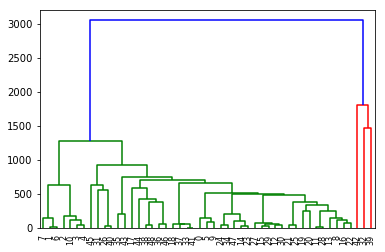

In [58]:
#Create a plot to view the output
z = hier.linkage(df1[['Price','Mileage']], 'single')
plt.figure()
dn = hier.dendrogram(z)

In [106]:
df1['Type'] = df1['Type'] .astype('category') 

In [105]:
col_names = list(df1.columns.values)
classnames = list(df1.Type.unique())

,Price,Country,Reliability,Mileage,Type,Weight,Disp.,HP
0,8895,USA,4.0,33,Small,2560,97,113
1,7402,USA,2.0,33,Small,2345,114,90
2,6319,Korea,4.0,37,Small,1845,81,63
3,6635,Japan/USA,5.0,32,Small,2260,91,92
4,6599,Japan,5.0,32,Small,2440,113,103
5,8672,Mexico,4.0,26,Small,2285,97,82
6,7399,Japan/USA,5.0,33,Small,2275,97,90
7,7254,Korea,1.0,28,Small,2350,98,74
8,9599,Japan,5.0,25,Small,2295,109,90
10,8748,Japan/USA,5.0,29,Small,2390,97,102


In [107]:
tre1 = tree.DecisionTreeClassifier('gini').fit(df1.ix[:,1:8],df1.Type)

ValueError: could not convert string to float: 'Van'

In [99]:
dot_data = StringIO()
tree.export_graphviz(tre1, out_file=dot_data,
                     feature_names=col_names[1:7],
                     class_names=classnames,
                     filled=True,
                     rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'tre1' is not defined